# Importing Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data Reading

In [61]:
gold_data=pd.read_csv('data_set.csv')

In [63]:
gold_data.head()

,Date,Gold_Bees,Sensex,Nifty50,USD/EUR,Crude_Oil
0,02-01-2009,13.3700,9958.219727,3046.750000,0.71824,46.340000
1,05-01-2009,13.1555,10275.599610,3121.449951,0.73282,48.810001
2,06-01-2009,13.0400,10335.929690,3112.800049,0.74019,48.580002
3,07-01-2009,13.2150,9586.879883,2920.399902,0.73470,42.630001
4,09-01-2009,13.1689,9406.469727,2873.000000,0.74322,40.830002


### Noramalizing Crude & USD/EUR price as per INR

In [66]:
exchange_rate_inr_usd = 83.0
gold_data['Crude_Oil_INR'] = gold_data['Crude_Oil'] * exchange_rate_inr_usd
gold_data['USD_EUR_INR'] = gold_data['USD/EUR'] * exchange_rate_inr_usd


In [48]:
gold_data = gold_data.drop(columns=['Crude_Oil', 'USD/EUR'])

In [50]:
gold_data.head()

,Date,Gold_Bees,Nifty50,Sensex,Crude_Oil_INR,USD_EUR_INR
0,02-01-2009,13.3700,3046.750000,9958.219727,3846.220012,59.613922
1,05-01-2009,13.1555,3121.449951,10275.599610,4051.230114,60.824058
2,06-01-2009,13.0400,3112.800049,10335.929690,4032.140152,61.435772
3,07-01-2009,13.2150,2920.399902,9586.879883,3538.290089,60.980102
4,09-01-2009,13.1689,2873.000000,9406.469727,3388.890152,61.687258


In [69]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3567 entries, 0 to 3566
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3567 non-null   object 
 1   Gold_Bees      3567 non-null   float64
 2   Sensex         3567 non-null   float64
 3   Nifty50        3567 non-null   float64
 4   USD/EUR        3567 non-null   float64
 5   Crude_Oil      3567 non-null   float64
 6   Crude_Oil_INR  3567 non-null   float64
 7   USD_EUR_INR    3567 non-null   float64
dtypes: float64(7), object(1)
memory usage: 223.1+ KB


#### Checking For Null Value

In [74]:
gold_data.isnull().sum()

Date             0
Gold_Bees        0
Sensex           0
Nifty50          0
USD/EUR          0
Crude_Oil        0
Crude_Oil_INR    0
USD_EUR_INR      0
dtype: int64

# Data Visualization

In [78]:
gold_data.describe()

,Gold_Bees,Sensex,Nifty50,USD/EUR,Crude_Oil,Crude_Oil_INR,USD_EUR_INR
count,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000
mean,30.059694,32248.220437,9675.396571,0.833983,71.094758,5900.864875,69.220569
std,9.786769,15309.043117,4528.898938,0.081894,21.696186,1800.783474,6.797212
min,0.335500,8160.399902,2573.149902,0.661030,-37.630001,-3123.290089,54.865490
25%,24.703500,19215.804690,5775.474853,0.758370,52.365000,4346.294981,62.944709
50%,27.455500,27985.539060,8529.450195,0.847600,71.330002,5920.390152,70.350799
75%,38.849998,39088.031250,11679.424805,0.900185,89.455002,7424.765152,74.715357
max,53.840000,72410.382810,21778.699220,1.042080,123.699997,10267.099743,86.492644


### Heat Map

In [96]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'], dayfirst=True)
numeric_columns = gold_data.select_dtypes(include='number')

In [98]:
# correlation = numeric_columns.corr()

In [100]:
correlation = gold_data.corr()

<Axes: >

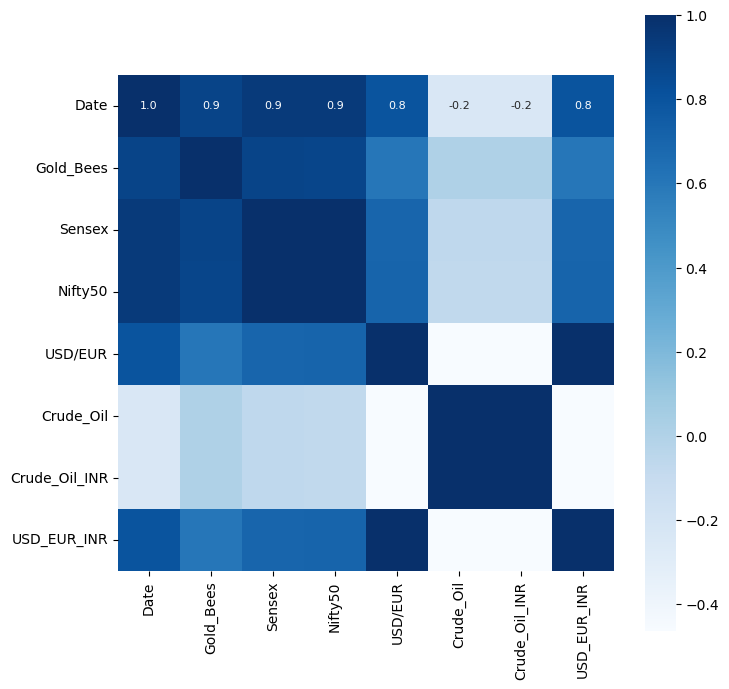

In [102]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [104]:
print(correlation['Gold_Bees'])

Date             0.890240
Gold_Bees        1.000000
Sensex           0.886326
Nifty50          0.880554
USD/EUR          0.604354
Crude_Oil        0.005687
Crude_Oil_INR    0.005687
USD_EUR_INR      0.604354
Name: Gold_Bees, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13552\1968256864.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['Gold_Bees'],color='green')
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Gold_Bees', ylabel='Density'>

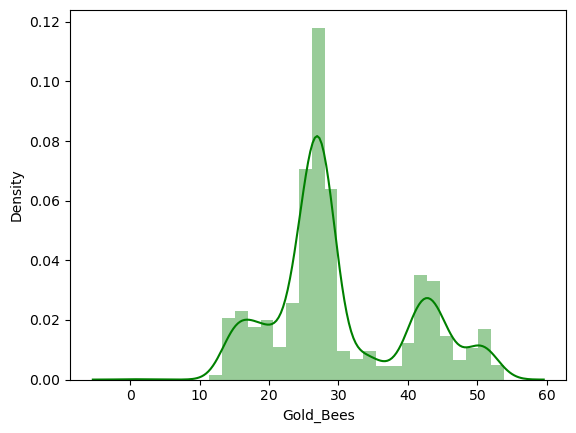

In [106]:
sns.distplot(gold_data['Gold_Bees'],color='green')

# Splitting Data

In [109]:
X = gold_data.drop(['Date','Gold_Bees'],axis=1)
Y = gold_data['Gold_Bees']

In [111]:
print(Y)

0       13.370000
1       13.155500
2       13.040000
3       13.215000
4       13.168900
          ...    
3562    52.860001
3563    53.189999
3564    53.459999
3565    53.630001
3566    53.840000
Name: Gold_Bees, Length: 3567, dtype: float64


In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

# Model: Random Forest Regressor

In [116]:
regressor = RandomForestRegressor(n_estimators=100)

In [118]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [120]:
test_data_prediction = regressor.predict(X_test)

In [122]:
print(test_data_prediction)

[27.27848536 19.77780361 28.32852491 25.52251009 44.24410003 14.88218979
 28.56182493 28.03039951 14.80351269 45.2936998  28.12697472 41.4734008
 50.70049999 23.31926006 14.52535096 28.33482468 42.32860123 41.1135004
 28.20750004 44.12460056 23.68817488 50.78889996 48.64539974 41.53419918
 26.61157541 50.25099964 33.54248989 24.8128709  26.2056252  42.4694009
 22.00132006 24.19879021 28.27319172 50.03410061 21.95995018 25.44113989
 25.7402804  26.76332487 26.18604019 24.47636007 26.29376528 28.40136528
 44.18929981 41.2557008  27.94945046 27.90327517 28.77478458 26.68569922
 20.61767075 27.12759674 27.85160011 44.01299976 28.90748028 27.25764032
 43.71949924 41.66659977 26.93678001 46.81710094 17.55009424 26.19399523
 17.74183464 29.6313821  14.79300411 25.00284542 26.7748201  14.6492947
 28.28774481 28.33149853 27.5252824  24.70175499 14.44380005 18.35942222
 41.50450016 41.36730068 40.23730019 47.73759956 42.78999966 25.55583988
 42.84749985 33.26125557 14.3889386  19.7298349  29.668

### Error Handling: R squared Error

In [125]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9886787776018643


In [127]:
Y_test = list(Y_test)

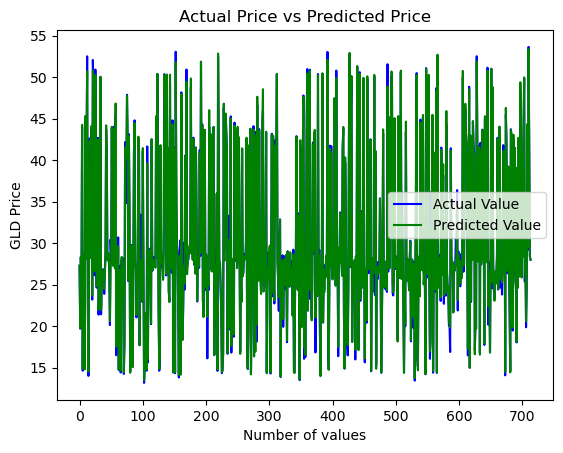

In [129]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()